<a href="https://colab.research.google.com/github/het-khatusuriya/ML/blob/main/d22ce166_NN_MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to a range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (convert 28x28 images to 1D arrays of size 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# building the structure of Neural Network
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4930 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3663 - accuracy: 0.8669
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3324 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3077 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2899 - accuracy: 0.8937
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2788 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2659 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2547 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2444 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.238

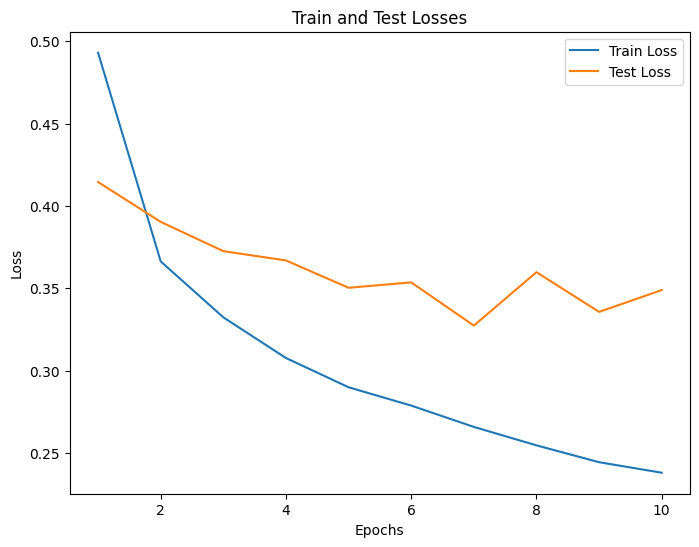

In [ ]:
import matplotlib.pyplot as plt
# Initialize lists to store training and testing losses
train_losses = []
test_losses = []
epochs = 10
batch_size = 32

# model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1, verbose=1)

    # Record training loss for this epoch
    train_loss = history.history['loss'][0]
    train_losses.append(train_loss)

    # Evaluate the model on the test set and record test loss for this epoch
    loss, _ = model.evaluate(x_test, y_test, verbose=0)
    test_losses.append(loss)

# Plot train and test losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')


  1/313 [..............................] - ETA: 7s - loss: 0.6092 - accuracy: 0.8438

313/313 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8818
Test loss: 0.3489, Test accuracy: 0.8818


313/313 [==============================] - 1s 2ms/step


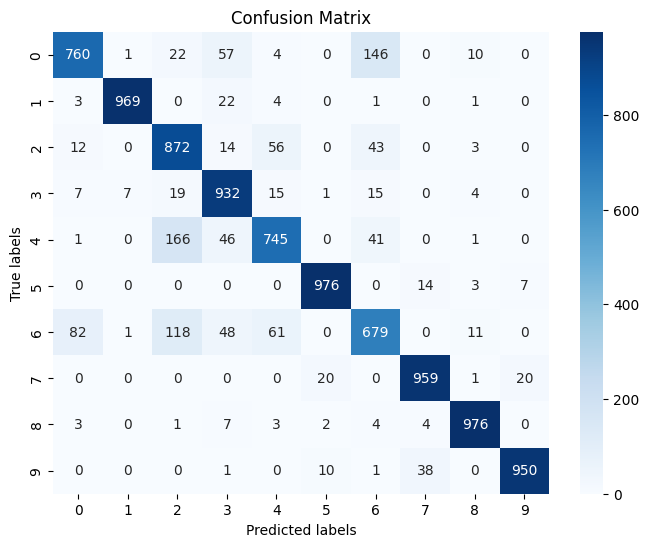

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
